# Approximation(근사치)
- 근사치는 참값(True value)과 비슷한 True value에 가까운 값을 의미함<br>
- 참값(True value)을 계산하기 너무 어렵거나 알수 없는 경우 approximation을 이용함<br>
\- 근사치를 사용하는 대표적인 경우는 숫자를 반올림하는 경우임

Approximation 대상 | 대표적인 방법 | 
:----                       | :----
미분가능함수                | Taylor Series
Data를 이용한 선형근사화    | Linear Regression
Data를 이용한 일반적 근사화 | Deep Neural Network

## 1. Taylor Series
- 미적분학(differential and integral calculus)에서, 테일러 급수(Taylor series)는 도함수(derivative function )들의 한 점에서의 값으로 계산된 항의 무한합으로 해석함수를 나타내는 방법

#### 1.1 정의: Taylor Series
- smooth function $f: R \rightarrow R$ 및 실수(real number) $a \in R$이 주어졌을 때, $f$의 Taylor Series는 다음과 같은 power series이다
$$
\begin{align}
f(x) &=\sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^{n} \\
       &= f(a) + f^{(1)}(a)(x-a) + \frac{1}{2} f^{(2)}(a)(x-a)^2 + \frac{1}{6} f^{(3)}(a)(x-a)^3 + \cdots
\end{align}
$$

#### 1.2 Maclaurin Series
- $a=0$인 Taylor Series
$$
\begin{align}
T_f(x) &=\sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!}x^{n} \\
       &= f(0) + f^{(1)}(0)x + \frac{1}{2} f^{(2)}(0)x^2 + \frac{1}{6} f^{(3)}(0)x^3 + \cdots
\end{align}
$$

#### 1.3 다변수 Taylor Series
- Taylor Series는 2개 이상의 다변수로 일반화될 수 있음. $d$개의 변수를 가지는 smooth function $f: R^{d} \rightarrow R$의 Taylor는 다음과 같다.
$$
\begin{align}
f(x_1, ..., x_d) &= \sum_{n_1=0}^{\infty} \cdots \sum_{n_d=0}^{\infty} 
     \frac{f^{(n_1)}(a_1) \cdots f^{(n_d)}(a_d)}{n_1! \cdots n_d!} (x_1-a_1)^{n_1} \cdots (x_d-a_d)^{n_d}\\
       &= f(a_1 \cdots a_d)  \\
       & \ \ \ + \frac{1}{1!} \sum_{j=1}^{d} \frac{\partial f(a_1, \cdots, a_d)}{\partial x_j} (x_j - a_j) \\
       & \ \ \ + \frac{1}{2!} \sum_{k=1}^{d} \sum_{j=1}^{d} 
                    \frac{\partial^2 f(a_1, \cdots, a_d)}{\partial x_j \partial x_k} 
                    (x_k - a_k)(x_j - a_j) \\
       & \ \ \ + \frac{1}{3!} \sum_{l=1}^{d} \sum_{k=1}^{d} \sum_{j=1}^{d} 
                    \frac{\partial^3 f(a_1, \cdots, a_d)}{\partial x_l \partial x_j \partial x_k} 
                    (x_l - a_l)(x_k - a_k)(x_j - a_j) + \cdots
\end{align}
$$

### 1.2 Taylor Series를 이용한 선형 근사(Linear Approximation)
- 선형 근사(linear approximation)는 어떤 함수를 선형 함수, 즉 일차 함수 만으로 근사하는 것을 말함<br>
\- 다음 그림과 같이 어떤 점 근처를 확대하면 확대할수록 (미분 가능한) 함수의 그래프와 그 점에서의 접선은 비슷해진다는 사실을 이용한 근사방법<br>
\- *참고블로그: 미분 가능한 조건 (https://m.blog.naver.com/saomath/221971803914)
- 어떤 점  $x=a$에서 미분가능한 함수 $f(x)$가 있을 때, 그 점에서의 접선의 방정식 $g(x)$는 다음과 같음
$$f(x) = f(a) + f'(a)(x-a) + \varepsilon $$
이다. 이 때 $f(x)$의 approximation
$$f(x) \approx f(a) +f'(a)(x-a)$$
를 $f$의 $a$에서의 선형근사(Linear Approximation)이라고 한다. 이는 Tayler 정리에 의하여 얻어진
$$f(x) = f(a) + f'(a)(x-a) + \varepsilon $$
에서 approximation $\varepsilon \approx 0$를 취한 것으로 볼 수 있다. 

#### 연습문제 1
$\sqrt{4.01}$을 함수 $f(x)=\sqrt{x}$의 $a=4$에서의 Linear approximation을 사용해서 근사값을 구하시오

In [ ]:
import numpy as np

def f_sqrt(x):
    return np.sqrt(x)

def d1_sqrt(x):
    return 1/(2*np.sqrt(x))

def approx(x, a):
    return f_sqrt(a) + d1_sqrt(a)*(x-a)

approx(4.01, 4)

2.0025

In [ ]:
np.sqrt(4.01)

2.0024984394500787

In [ ]:
approx(4.01, 4) - np.sqrt(4.01)

1.5605499212867358e-06

In [ ]:
a_set = np.linspace(2, 6, 30)
print(a_set)

[2.         2.13793103 2.27586207 2.4137931  2.55172414 2.68965517
 2.82758621 2.96551724 3.10344828 3.24137931 3.37931034 3.51724138
 3.65517241 3.79310345 3.93103448 4.06896552 4.20689655 4.34482759
 4.48275862 4.62068966 4.75862069 4.89655172 5.03448276 5.17241379
 5.31034483 5.44827586 5.5862069  5.72413793 5.86206897 6.        ]


In [ ]:
app = approx(4.01, a_set)
error = np.abs(np.sqrt(4.01) - app)
error

array([1.22357438e-01, 9.98376500e-02, 8.08498604e-02, 6.48397536e-02,
       5.13628600e-02, 4.00584074e-02, 3.06303588e-02, 2.28334188e-02,
       1.64625453e-02, 1.13449771e-02, 7.33409609e-03, 4.30464734e-03,
       2.14897689e-03, 7.74041965e-04, 9.90136808e-05, 5.33389250e-05,
       5.75161556e-04, 1.61002712e-03, 3.10981314e-03, 5.03184033e-03,
       7.33812971e-03, 9.99477847e-03, 1.29714328e-02, 1.62408408e-02,
       1.97784708e-02, 2.35621854e-02, 2.75719606e-02, 3.17896441e-02,
       3.61987455e-02, 4.07842543e-02])

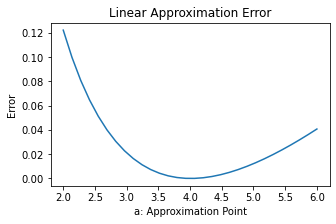

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 3))
plt.plot(a_set, error)
plt.title('Linear Approximation Error')
plt.xlabel('a: Approximation Point')
plt.ylabel('Error');
plt.show()

#### 연습문제 2
함수 $f(x)=(x-4)^2-2$에 대해  a_set = np.linspace(0, 8, 20)에서의 Linear approximation을 사용해서 근사값을 구하시오

### 1.3 Taylor Series를 이용한 2차근사(Quadratic Approximation)
- Taylor에서 approxiamtion을 위해 2차항까지 이용한 방법
$$
\begin{align}
T_f(x) &\approx \sum_{n=0}^{2} \frac{f^{(n)}(a)}{n!}(x-a)^{n} \\
       &= f(a) + f^{(1)}(a)(x-a) + \frac{1}{2} f^{(2)}(a)(x-a)^2 
\end{align}
$$

(과제 1)<br>
함수 $f(x)=(x-4)^2-2$에 대해  a_set = np.linspace(0, 8, 20)에서의 Quadratic approximation을 사용해서 근사값을 구하는 program을 작성하시오 

Taylor 시리즈: 미분과 **power function**
퓨리에 시리즈:   Sine, Cosine     **주기함수**

### 2. Statistical Model

### 2.1 다양한 궁금증
- 아빠의 키$(x)$가 크면 아이의 키$(y)$도 클까?<br><br>
- 아이의 키  $y$에 영향을 미칠 것으로 예상할 수 있는 변수

변수 | 설명
:--- |:----
 $$x_1$$ | 유전자
 $$x_2$$ | 1일 영양섭취량
 $$x_3$$ | 스트레스지수
 $$\vdots$$ | $$\vdots$$
 $$x_{p}$$ | 형제 수

$\Longrightarrow $ $y$에 영향을 미칠 것으로 예상되는 $x_1$와 $y$  사이에는 어떤 관계가 있을까? 하나의 $x$변수와 $y$의 관계<br>
$\Longrightarrow $ $y$에 영향을 미칠 것으로 예상되는 $x_1$과 $x_2$에 대해,  $x_1$과 $x_2$ 사이에는 어떤 관계가 있을까?<br>
$\Longrightarrow $ $y$에 영향을 미칠 것으로 예상되는 $x_1, x_2, ..., x_{p}$와 $y$  사이에는 어떤 관계가 있을까?  여러개의 $x_i$변수와 $y$의 관계<br><br>
- 통계학에서, 회귀 분석(regression analysis)은 independent variable들 $X = \left(x_1, ..., x_{p}  \right)$과 관찰된 연속형 변수 $y$들에 대해 두 변수 사이의 통계적 Model을 구하는 방법

### 2.2 다루는 문제의 상황
#####   $Data$에 기반한 분석
- Unknown function: $y=f(z_1, z_2, ..., z_{K})$<br>
우리가 생각하고 있는 $f(z_1, ..., z_{K})$가 unknown 함수라는 의미는 세상에 존재하는 임의의  System을 대변한다는 의미임<br>
- 우리가 다루려고 하는 문제의 상황<br>
\- $f(z_1, z_2, ..., z_{K})$는 unknown이지만 다행히 $Sample$  $y_i, i=1, 2, ..., n$은 얻을 수 있는 상황임<br>
\- 이러한 $Sample \ y_i, i=1,2,...,n$들을 통해 unknown 세상을 일부 들여다 볼수 있다는 의미임<br>

##### 관측 가능한 세상
$y=f(z_1, z_2, ..., z_K)$
- 우리가 가지고 있는 사전지식을 이용하여 $y$에 영향을 미칠 것이라고 짐작되는 $x_1, x_2, ..., x_{p}$을 선정
- $\left( x_1, x_2, ..., x_{p} \right)$들과 관측된 $y$의 관계를 근사화(approximation)
- $z_i$와 $x_l$이 일치할 수도 있고 그렇지 않을 수도 있음
- $x_1, x_2, ..., x_{p}$들이 잘 선정되었는지는 feature selection, feature extraction등의 방법을 이용하여 확인

<figure>
<img src="https://drive.google.com/uc?export=view&id=1eaCjN2yPAWzNNZUz9baaj2xeOWHk5GxC"/, width = 600, height = 250>
</figure>


\- (주의)일반적으로 통계학에서는 𝑆𝑎𝑚𝑝𝑙𝑒이라는 의미는 모집단(population)에서 추출된 값으로 $iid(independent \ and \ identical \ distribution)$을 의미하지만 기계학습에서는 $iid$를 의미하지는 않을 수 있음<br>
$Y \sim N(\mu, \sigma^2)$일 때, $Sample \ Y_1, Y_2, ..., Y_n$은 다음 식이 성립한다<br>
$$Y_i \sim N(\mu, \sigma^2), i=1,...,n$$
$$P(Y_1 = y_1, Y_2 = y_2, ...Y_n = y_n)=P(Y_1 = y_1)P(Y_2 = y_2)...P(Y_n = y_n)=\prod_{i=1}^{n}P(Y_i = y_i)$$

####  [참고] 인공지능에서 사용하는 2가지 independent의 의미
- 선형대수학: linear independt $a . b = 0$ <br>
- 통계학: 확률변수 $X_1, X_2$에 한 결합확률 $P(X_1 = x_1, X_2 = x_2)=P(X_1=x_1) \times P(X_2 = x_2)$

### 2.3  공분산과 상관관계 
- (참고) 확률변수 $X$가 확률질량분포 $P(X=x)$ 또는 확률밀도함수 $f(x)$를 따를 때<br>
\- 기대치 $E(X)$는 다음과 같음 
$$E(X)= \sum_{x \in \mathcal X}xP(X=x)$$
$$E(X) = \int_{x \in  \mathcal X}xf(x)dx$$
\- 주사위를 던지는 시행에서의 기대치는 다음과 같음<br>
   $X=$주사위 눈금의 수, $X \in \mathcal X = (1,2,3,4,5,6)$
   $$P(X=x)=
\begin{cases}
1/6, & \mbox{if } x \mbox{=1,2,3,4,5,6} \\
0 & \mbox{ otherwise}
\end{cases}$$
$$E(X) = \sum_{x=1}^{6} x P(X=x)= \sum_{x=1}^{6} x \frac{1}{6}=\frac {21}{6}=3.5$$

<br>
- 공분산(covariance)은 두 확률변수(pairwise) 간의 선형관계를 파악하는 방법<br>
- 동시에 여러개의 확률변수간의 관계를 이야기하는 것이 아님<br>
- 확률변수 $X_1$와 $X_2$의 기댓값과 분산을 각각 $\left( \mu_{1}, \sigma_{1}^2 \right)$과   $\left( \mu_{2}, \sigma_{2}^2 \right)$라고 할 때
 공분산$(Covariance)$은 다음과 같이 정의됨<br><br>

#####  (1) 공분산(Covariance)
##### 정의
$ \begin{align}
\qquad  Cov(X_1, X_2) & = E(X_1-\mu_1)(X_2-\mu_2)\\
                      & = E(X_1 X_2 - \mu_2 X_1 - \mu_1 X_2 + \mu_1 \mu_2)\\
                      & = E(X_1 X_2) - \mu_2 E(X_1) - \mu_1 E(X_2) + \mu_1 \mu_2\\
                      & = E(X_1 X_2) - \mu_1 \mu_2
\end{align}$<br><br>

$  
Var(X) = E(X-\mu)^2
$

##### 성질<br>
$\quad$ $Cov(X, X)=Var(X)$<br>
$\quad$ $Cov(X, Y)=Cov(Y, X)$<br>
$\quad$ $Cov(aX, bY)=abCov(X, Y)$<br>
$\quad$ $Cov(aX+bY, U)=aCov(X, U) + bCov(Y, U)$<br> 
 

##### 공분산행렬(Covariance Matrix)
Column vector인  확률변수 $X=(X_1, ..., X_p)$와 $Y=(Y_1, ..., Y_p)$의 기댓값이 각각 $\mu_X$와 $\mu_Y$라고 할 때 $m \times n$ 공분산행렬은 다음과 같다<br>
$\quad$ $Cov(X, Y) = E\left((X-\mu_X)(Y-\mu_Y)\right)$<br>
$\quad$ $Cov(X, Y) = Cov(Y, X)$


##### 표본공분산(Sample Covariance)
피어슨 상관계수에 사용되는 표본 공분산(sample covariance)은 다음과 같다.<br>
$\quad$ $Cov(X, Y) = \frac{\sum_{i=1}^{n}(X_i- \bar X)(Y_i- \bar Y)}{n-1}$<br>
$\quad$ 

#####  (2) 상관관계
- 모집단(Population)에 적용되는 Pearson's correlation coefficient, $\rho_{X_1 X_2}$<br>
$ \begin{align}
\qquad \rho_{X_1 X_2} &= \frac{Cov(X_1, X_2)}{\sigma_{X_1}\sigma_{X_2}}
\end{align}$<br>

$$ -1\le \rho \le 1$$
<br>
- 표본(Sample)에 적용되는 Pearson's correlation coefficient, $r_{X_1 X_2}$<br>
$ \begin{align}
\qquad r_{X_1 X_2} = \frac{S_{X_1 X_2}}   {S_{X_1 X_1} S_{X_2 X_2}}
\end{align}$<br>
<br>
$ \qquad$ 여기서 $S_{X_1 X_2} = \sum_{i=1}^n (x_{1i}-\bar{x_1})(x_{2i}-\bar{x_2})$, 
$S_{X_1 X_1} = \sqrt{     \sum_{i=1}^n (x_{1i}-\bar{x_1})^2   }$, 
$S_{X_2 X_2} = \sqrt{     \sum_{i=1}^n (x_{2i}-\bar{x_2})^2   }$<br>

### 2.4  선형회귀분석

#### (1) 선형회귀의 Model과 가정
- 선형회귀(Linear regression)는 종속 변수 $y$와 한 개 이상의 독립 변수 (또는 설명 변수) $X=\left(x_1, \cdots ,x_{p}  \right)$와의 선형 관계를 추정하는 통계적 모델링 기법
$$ 
\begin{align}
Model에 \ 대한 \ 가정: \ y &= g(x_1, ..., x_{p}) + \varepsilon \\
           &= w_0 + w_1 x_1 + \cdots + w_{p} x_{p} + \varepsilon \\
Error에 \ 대한 \ 가정: \  \varepsilon & \sim (0, \Sigma)
\end{align}
$$ <br>

$$
\begin{align}
\Sigma
 &=
\begin{bmatrix}
\sigma_{11} & \cdots &  \sigma_{1c} \\
\vdots & \ddots & \vdots \\
\sigma_{c1} & \cdots &  \sigma_{nn}
\end{bmatrix} \\
\sigma_{ij} &= E \left[ \varepsilon_i - E \left( \varepsilon_i \right) \right] \left[ \varepsilon_i - E \left( \varepsilon_i \right) \right] = E \left(  \varepsilon_i \varepsilon_j \right)
\end{align}
$$

<figure>
<img src="https://drive.google.com/uc?export=view&id=1qPgR0Ttz1wfz_f4rJ0wqqYO7PMnhqjiI"/, height=300, width=600>
</figure>

<figure>
<img src="https://drive.google.com/uc?export=view&id=1R8vK4dSWDtDxV5ZPkJNuS-Z6ozpBbbth"/>
</figure>


#### (2) Linear Model Parameter $w= \left(w_0, w_1, \cdots, w_{p}  \right)$ 의 추정
- dataset $(X_i, y_i), i=1,...,n$를 이용하여 $ \widehat{w} $을 추정(estimation)하는 방법으로 2가지 방법이 있음<br>
\- Analytical Method<br>
\- Gradient Descent Method<br>

#####   (2.1) Analytical Method를 이용한  Regression Parameter $W$ 추정
  1.  Linear Regression Model Problem<br>
  - Quadratic Programming임<br>
  \- Objective function: Quadratic form<br>
  \- Constraints: Linear form<br><br>

------
$
\begin{align}
 & Objective function \ \ \   \underset{w}{minimize} \ \ L(w) =  \varepsilon^T\varepsilon  \\
 & subject \ to \qquad \qquad  y = Xw + \varepsilon  
\end{align}
$ 
------
------


<br>
  1.  Parameter Estimation<br>
  - $n$개의 $X_i=[x_{i1}, x_{i2}, ..., x_{ip}], i=1,2,...,n$의 조건에서 $n$개의 $y_i$를 관측<br>
    $ y_i =w_0 + w_1 x_{i1} + \cdots + w_{p} x_{ip} + \varepsilon_i, i=1,...,n $ <br>


##### 벡터 표현

$
\begin{align}
\qquad y_1 &= w_0 + w_1 x_{11} + w_2 x_{21} + ...  + w_p x_{1p} + \varepsilon_1 \\
       y_2 &= w_0 + w_1 x_{12} + w_2 x_{22} + ...  + w_p x_{2p} + \varepsilon_2 \\
           &. \\
           &. \\
           &. \\
       y_n &= w_0 + w_1 x_{1n} + w_2 x_{2n} + ...  + w_p x_{np} + \varepsilon_n
\end{align}   
$


$\Longrightarrow \qquad  y=Xw+\varepsilon$

$ \qquad \qquad
y = 
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{bmatrix}
$, 
$
X =
\begin{bmatrix}
x_{11} \ x_{12} & \cdots & x_{1p} \\
x_{21} \ x_{22} & \cdots & x_{2p} \\
\vdots \ \vdots & \ddots & \vdots \\
x_{n1} \ x_{n2} & \cdots & x_{np} \\
\end{bmatrix}
$, 
$
w = 
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_p \\
\end{bmatrix}
$, 
$
\varepsilon = 
\begin{bmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\vdots \\
\varepsilon_n \\
\end{bmatrix}
$

$\qquad \qquad \quad (n \times 1)  \qquad \qquad  (n \times p) \qquad \qquad  (n \times 1) \qquad  (n \times 1)$

$ \underset{(n \times 1)}{y} = \underset{(n \times p)}{X} \underset{(p \times 1)}{w} + \underset{(n \times 1)}{\varepsilon}$ <br><br>
$Loss(w) = \varepsilon^T\varepsilon = (y-Xw)^T(y-Xw)=y^Ty-2w^TX^Ty+w^TX^TXw$ <br><br>
$\frac{\partial Loss(w)}{\partial w}=0$를 만족하는 $w$를 구하면 됨<br>
$\frac{\partial Loss(w)}{\partial w}=-2X^Ty+2X^TXw$<br>
$ {w} = (X^TX)^{-1}X^Ty $

#####   (2.2) Gradient Descent Method를 이용한 Regression Parameter $w$추정

- $Gradient Descent$를 이용한 방법<br>
$ \qquad w^{(i+1)} = w^{(i)} - \rho \nabla L(w^{(i)}) $<br>
$\qquad 여기서 \ \rho: 학습율,  \nabla L(w^{(i)})={\frac{\partial L(w)}{\partial w}}|_{w=w^{i}}$

<figure>
<img src="https://drive.google.com/uc?export=view&id=1txeHBV8wu7E_W1sMvYvPxxJBmeL4wrjz"/, height=400,width=600>
</figure>


#### (예제 1) Gradient Descent 예
$y=x^2$의 최소값을 Gradient descent를 이용하여 찾는 프로그램을 작성하시오

In [ ]:
import random
import matplotlib.pyplot as plt

def f(x):
     return x ** 2

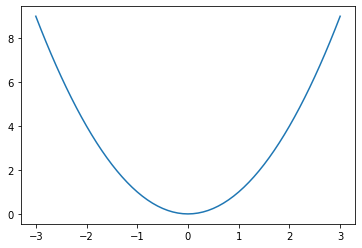

In [ ]:
# 그래프를 그릴 x값의 범위 (-3.0, -2.9, ..., 2.9, 3.0)
xs = [x / 10 for x in range(-30, 31)]
# 그래프를 그릴 y 좌표들
ys = [f(x) for x in xs]

plt.plot(xs, ys)
plt.show()

#### (예제 2) Linear Regression의 예

- 가상 data의 생성

In [ ]:
import numpy.random as rnd
X = 3*rnd.rand(100, 1) # X=100개의 난수를 생성하여 3를 곱한 수
y = 2 + 4*X + rnd.randn(100, 1)  # 생성된 난수 X를 이용하여 y 난수를 생성

-  (X, y)의 plot

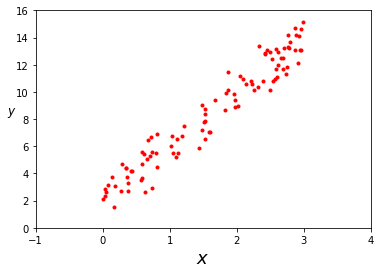

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(X, y, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.axis([-1, 4, 0, 16])
plt.show()

- sklearn을 이용한 Regression parameter의 추정

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
intercept = lin_reg.intercept_  # intercept_는 class내의 내부변수
slope = lin_reg.coef_

print('intercept =\n{}\n'.format(intercept))
print('slope =\n{}\n'.format(slope))


intercept =
[2.34386919]

slope =
[[3.83431572]]



- Regression (X, y)의 관계식 그래프

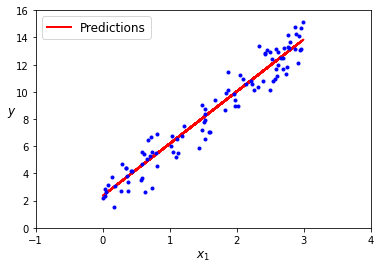

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

y_predict = lin_reg.predict(X)
plt.plot(X, y_predict, "r-", linewidth=2, label="Predictions")

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.legend(loc="upper left", fontsize=12)
plt.axis([-1, 4, 0, 16])
plt.show()

- X_new=[[1], [2], [3]] 일 때 y의 예측값을 출력

In [ ]:
X_new = [[1],[3], [2]]
y_predict = lin_reg.predict(X_new)
y_predict

array([[ 6.1781849 ],
       [13.84681633],
       [10.01250062]])

#### (예제 2) Non-linear Regression의 예

- $(X, y)$ dataset 생성

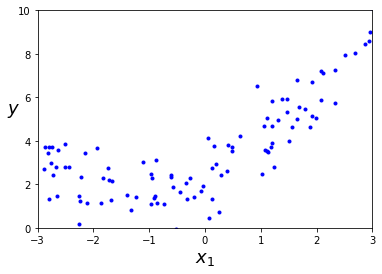

In [ ]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print('\n첫번째 X={}\n첫번째 X의 Polynomial term ={}\n\n'.format(X[0], X_poly[0]))


첫번째 X=[-2.24704289]
첫번째 X의 Polynomial term =[-2.24704289  5.04920176]




In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print('\nintercept_={}\ncoef_={}\n\n'.format(lin_reg.intercept_, lin_reg.coef_))


intercept_=[2.36443673]
coef_=[[1.0302171  0.43495544]]




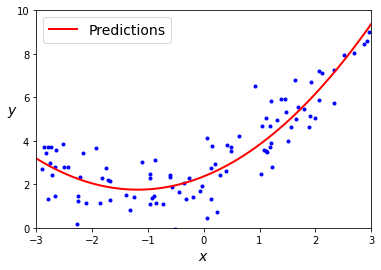

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

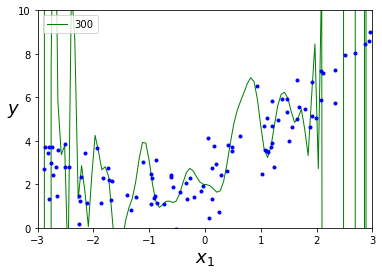

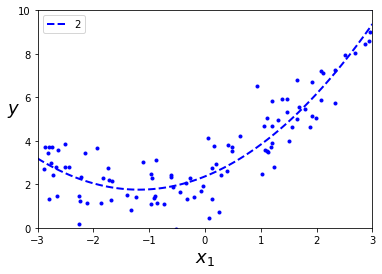

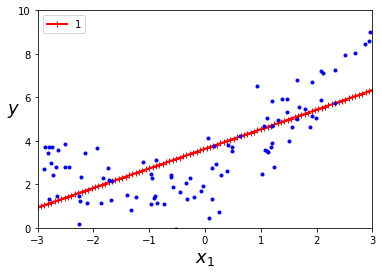

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
   polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
   std_scaler = StandardScaler()
   lin_reg = LinearRegression()
   polynomial_regression = Pipeline((
         ("poly_features", polybig_features),
         ("std_scaler", std_scaler),
         ("lin_reg", lin_reg),
     ))
   polynomial_regression.fit(X, y)
   y_newbig = polynomial_regression.predict(X_new)
   plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

   plt.plot(X, y, "b.", linewidth=3)
   plt.legend(loc="upper left")
   plt.xlabel("$x_1$", fontsize=18)
   plt.ylabel("$y$", rotation=0, fontsize=18)
   plt.axis([-3, 3, 0, 10])
   plt.show()

#### (예제 3) Non-linear Regression의 예

### 3. Function Approximation Algorithms방법인 Neural Networks 
- Machine Learning에서 supervised learning  function approximation으로 설명될 수 있음 <br>
\- 입력 $X \in R^p$과 출력 $y \in R^{OUT}$으로 구성된 dataset이 있을 때, $f: X \rightarrow y$인 Unknown function $f$가 있다고 가정함<br>
\- Supervised Learning Algorithm은 함수 $f$를 근사화하는 방법임

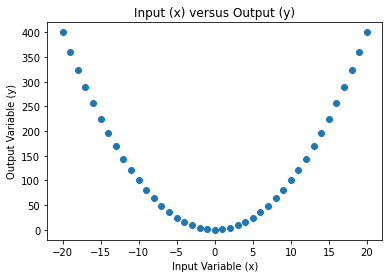

In [ ]:
import matplotlib.pyplot as plt

x = [i for i in range(-20,21)]

y = [i**2.0 for i in x]

plt.scatter(x,y)
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.show()

##### Approximating a Simple Function

In [ ]:
import numpy as np
# define the dataset
x = np.asarray([i for i in range(-50,51)])
y = np.asarray([i**2.0 for i in x])
print(x.min(), x.max(), y.min(), y.max())

-50 50 0.0 2500.0


In [ ]:
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


In [ ]:
from keras.layers import Dense, Flatten, Reshape
from keras.models import Sequential

model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))

In [ ]:
model.compile(loss='mse', optimizer='adam')
model.fit(x, y, epochs=500, batch_size=10, verbose=0)

In [ ]:
yhat = model.predict(x)

In [ ]:
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)
#print('MSE: {}'.format(mean_squared_error(y_plot, yhat_plot)))

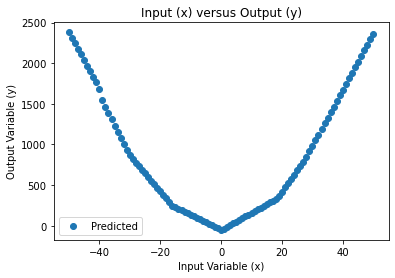

In [ ]:
plt.scatter(x_plot,yhat_plot, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

-50 50 0.0 2500.0
0.0 1.0 0.0 1.0


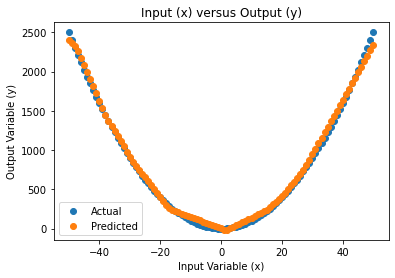

In [ ]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot

# define the dataset
x = asarray([i for i in range(-50,51)])
y = asarray([i**2.0 for i in x])
print(x.min(), x.max(), y.min(), y.max())

# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())
# design the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))

# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')

# ft the model on the training dataset
model.fit(x, y, epochs=500, batch_size=10, verbose=0)

# make predictions for the input data
yhat = model.predict(x)

# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)

# report model error
#print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))
# plot x vs y
plt.scatter(x_plot,y_plot, label='Actual')
# plot x vs yhat
plt.scatter(x_plot,yhat_plot, label='Predicted')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()